In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("https://minio.lab.sspcloud.fr/arougier/donneefinances/Quelsques_cours_Actions_Bourse_Paris.csv", sep=";")
df

,ticker,label,date,open,high,low,close,volume,currency
0,FR0010340141,ADP,43832,176.800,178.100,175.100,176.100,70483,EUR
1,FR0010340141,ADP,43833,176.000,176.000,173.200,173.700,45246,EUR
2,FR0010340141,ADP,43836,173.300,173.300,170.900,171.700,78258,EUR
3,FR0010340141,ADP,43837,172.700,173.100,171.900,172.100,36545,EUR
4,FR0010340141,ADP,43838,171.800,173.600,171.300,173.600,56082,EUR
...,...,...,...,...,...,...,...,...,...
7340,XC0009694271,NASDAQ Composite,11/11/2022,11124.749,11352.429,11069.829,11323.331,0,NaN
7341,XC0009694271,NASDAQ Composite,14/11/2022,11233.904,11350.125,11167.165,11196.220,0,NaN
7342,XC0009694271,NASDAQ Composite,15/11/2022,11474.820,11492.616,11241.152,11358.410,0,NaN
7343,XC0009694271,NASDAQ Composite,16/11/2022,11260.095,11286.101,11162.923,11183.659,0,NaN


In [ ]:
#Il faut rajouter des statistiques descriptives sur le premier jeu de donnée

On remarque qu'il faut modifier cette base de données car certaines informations sont incomplètes, ou que les informations ne sont pas correctement mises pour notre analyse.
Par exemple, les dates ne sont pas écrite de la même manière, et les devises sont absentes pour certaines actions. Il faut donc modifier cela. Les dates pour chaques actions vont du 2 Janvier 2022 jusqu'au 17 Novembre 2022. Nous devons donc modifer cela pour chaque actions
Nous allons donc couper le tableau avec toutes les actions et effectuer cette modification sur chaque action puis remettre tous les tableaux ensemble

In [4]:
l = np.unique(df.label)
l

lst=[]
for x in l:
    lst.append(x)
    
print(lst)
len(lst)

['ADP', 'AXA', 'BNP PARIBAS', 'CAC 40', 'DANONE', 'DAX', 'NASDAQ Composite', 'Nikkei 225', 'SANOFI', 'SOCIETE GENERALE']


10

On remarque que certaines informations ne nous intéressent pas dans ces données, on décide alors de les effacés. Ces informations peuvent être intéressantes mais il est difficile d'intégrer le volumme des échanges dans notre modèle prédictoire.

In [5]:
new_df = df.drop(columns = ["ticker", "volume"])
new_df

,label,date,open,high,low,close,currency
0,ADP,43832,176.800,178.100,175.100,176.100,EUR
1,ADP,43833,176.000,176.000,173.200,173.700,EUR
2,ADP,43836,173.300,173.300,170.900,171.700,EUR
3,ADP,43837,172.700,173.100,171.900,172.100,EUR
4,ADP,43838,171.800,173.600,171.300,173.600,EUR
...,...,...,...,...,...,...,...
7340,NASDAQ Composite,11/11/2022,11124.749,11352.429,11069.829,11323.331,NaN
7341,NASDAQ Composite,14/11/2022,11233.904,11350.125,11167.165,11196.220,NaN
7342,NASDAQ Composite,15/11/2022,11474.820,11492.616,11241.152,11358.410,NaN
7343,NASDAQ Composite,16/11/2022,11260.095,11286.101,11162.923,11183.659,NaN


In [6]:
liste_df=[]

for i in range(len(lst)):
    df0=new_df[new_df.label==lst[i]]
    liste_df.append(df0)

In [7]:
liste_df

[    label   date    open    high     low   close currency
 0     ADP  43832  176.80  178.10  175.10  176.10      EUR
 1     ADP  43833  176.00  176.00  173.20  173.70      EUR
 2     ADP  43836  173.30  173.30  170.90  171.70      EUR
 3     ADP  43837  172.70  173.10  171.90  172.10      EUR
 4     ADP  43838  171.80  173.60  171.30  173.60      EUR
 ..    ...    ...     ...     ...     ...     ...      ...
 737   ADP  44876  143.00  146.95  142.70  146.50      EUR
 738   ADP  44879  146.25  149.20  146.25  147.55      EUR
 739   ADP  44880  147.35  150.20  146.65  148.05      EUR
 740   ADP  44881  147.85  148.20  140.90  141.80      EUR
 741   ADP  44882  142.15  143.10  140.90  142.60      EUR
 
 [742 rows x 7 columns],
      label   date    open    high     low   close currency
 2226   AXA  43832  25.390  25.585  25.315  25.460      EUR
 2227   AXA  43833  25.380  25.525  25.215  25.470      EUR
 2228   AXA  43836  25.200  25.255  24.905  25.135      EUR
 2229   AXA  43837  25.24

On a donc nos 10 tableaux, on remarque que 4 tableaux non pas de devises, il faut donc modifier cela. Seul le CAC 40 est en euro, et les 3 autres sont en dollars
On doit aussi changer les dates pour les autres tableaux

In [8]:
#on modifie d'abord les devises des actions

liste_df[3]=liste_df[3].fillna("EUR")
liste_df[5]=liste_df[5].fillna("EUR")
liste_df[6]=liste_df[6].fillna("USD")
liste_df[7]=liste_df[7].fillna("USD")
liste_df

[    label   date    open    high     low   close currency
 0     ADP  43832  176.80  178.10  175.10  176.10      EUR
 1     ADP  43833  176.00  176.00  173.20  173.70      EUR
 2     ADP  43836  173.30  173.30  170.90  171.70      EUR
 3     ADP  43837  172.70  173.10  171.90  172.10      EUR
 4     ADP  43838  171.80  173.60  171.30  173.60      EUR
 ..    ...    ...     ...     ...     ...     ...      ...
 737   ADP  44876  143.00  146.95  142.70  146.50      EUR
 738   ADP  44879  146.25  149.20  146.25  147.55      EUR
 739   ADP  44880  147.35  150.20  146.65  148.05      EUR
 740   ADP  44881  147.85  148.20  140.90  141.80      EUR
 741   ADP  44882  142.15  143.10  140.90  142.60      EUR
 
 [742 rows x 7 columns],
      label   date    open    high     low   close currency
 2226   AXA  43832  25.390  25.585  25.315  25.460      EUR
 2227   AXA  43833  25.380  25.525  25.215  25.470      EUR
 2228   AXA  43836  25.200  25.255  24.905  25.135      EUR
 2229   AXA  43837  25.24

On remarque donc que certaines de ces actions sont en dollars et non en euro, on va alors faire le taux de change en considérant la date du 17 Novembre 2022. Donc 1 dollars vaut 0.95 centimes.
Cela simplifie énormément les calcules car le prix du dollars change tous les jours, nous verrons si nous l'intégrons dans notre projet final.

In [9]:
liste_action_USA = [5,6]
for i in range(5,5+len(liste_action_USA)):
    liste_df[i].open = liste_df[i].open*0.95
    liste_df[i].high = liste_df[i].high*0.95
    liste_df[i].low = liste_df[i].low*0.95
    liste_df[i].close = liste_df[i].close*0.95
    liste_df[i] = liste_df[i].replace("USD", "EUR")
liste_df[6]

,label,date,open,high,low,close,currency
6619,NASDAQ Composite,02/01/2020,8587.48605,8638.75660,8560.34550,8637.57955,EUR
6620,NASDAQ Composite,03/01/2020,8527.61040,8612.46820,8527.61040,8569.73150,EUR
6621,NASDAQ Composite,06/01/2020,8496.32690,8618.78760,8496.32690,8617.89175,EUR
6622,NASDAQ Composite,07/01/2020,8622.81275,8637.33255,8590.42535,8615.15195,EUR
6623,NASDAQ Composite,08/01/2020,8614.62660,8710.44265,8606.41290,8672.77990,EUR
...,...,...,...,...,...,...,...
7340,NASDAQ Composite,11/11/2022,10568.51155,10784.80755,10516.33755,10757.16445,EUR
7341,NASDAQ Composite,14/11/2022,10672.20880,10782.61875,10608.80675,10636.40900,EUR
7342,NASDAQ Composite,15/11/2022,10901.07900,10917.98520,10679.09440,10790.48950,EUR
7343,NASDAQ Composite,16/11/2022,10697.09025,10721.79595,10604.77685,10624.47605,EUR


In [ ]:
#on modifie les dates 

On fait désormais des graphiques des courbes des prix des différentes actions. 

In [134]:
len(liste_action_USA)

2

On effectue désormais une visualisation des données. 
Pour cela, on décide donc de faire des graphiques des prix de chaque actions sur leurs prix d'ouverture. 

In [16]:
liste_df[0]['open']

0      176.80
1      176.00
2      173.30
3      172.70
4      171.80
        ...  
737    143.00
738    146.25
739    147.35
740    147.85
741    142.15
Name: open, Length: 742, dtype: float64

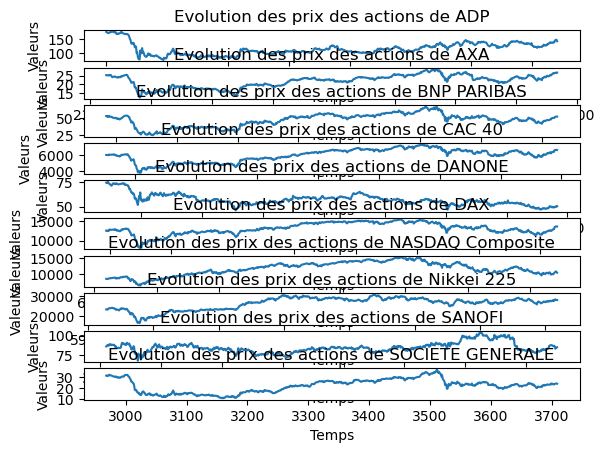

In [28]:
for i in range(len(liste_df)):
    j=i+1
    new_df = liste_df[i]['open']
    plt.subplot(len(liste_df),1,j)
    plt.plot(new_df) 
    plt.title("Evolution des prix des actions de " + lst[i])
    plt.ylabel("Valeurs")
    plt.xlabel("Temps")
             
             
             
#new_df.plot(x="Temps", y = "Valeurs", title = "Evolution du prix des actions" + lst[i])
    
    
    

Il faudra modifier l'affichage de l'évolution des prix, car il est très condensé. Ce qui rend illisible n'importe qu'elle analyse de l'évolution des prix. 
Il faut aussi voir si ce que nous pouvons visualiser aussi ? 

III La modélisation, une manière prédictive pour connaître les prix ? 

Dans cette partie on va donc s'inspirer de la régression linéaire sur une action, et la généralisé sur le tout. 
On décide alors de passer par une boucle for

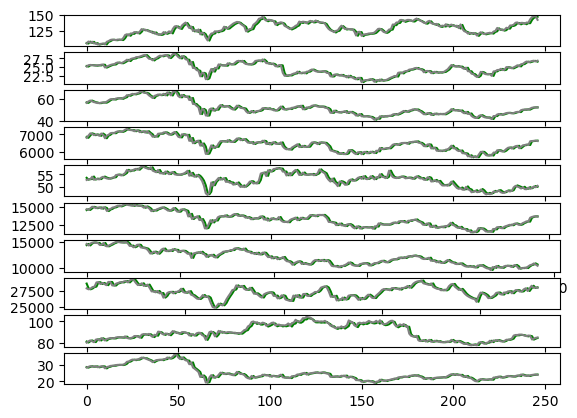

In [54]:
reg = LinearRegression()
#L'objectif est de faire une régression linéaire sur les valeurs des prix en fonction des valeurs précédentes. 
for i in range(len(liste_df)):
    j = 1 + i
    X1 = liste_df[i]['open']
    X1 = X1.to_numpy()
    X = np.delete(X1, [-1])
    Y = np.delete(X1, [0])
    
    #On définit les tests, pour cela il nous faut une valeur ou arreter les données on la note p
    p = int((2/3)*len(X))
    X_train = X[:p]
    Y_train = Y[:p]
    X_test = X[p:]
    Y_test = Y[p:]
    #On créé une matrice qui contiendra toutes les valeurs prédites pour chaque actions, pénible car il n'y a pas le même
    #nombre de Y_test pour toutes les actions = mettre valeur 0 sinon ? 
    
    
    #on passe désormais à la régressions
    reg.fit(np.transpose([X_train]), np.transpose([Y_train]))
    y_pred = reg.predict(np.transpose([X_test]))
    plt.subplot(len(liste_df),1,j)
    plt.plot(y_pred, color='green')
    plt.plot(Y_test, color='gray')
    
#Pour tester l'efficacité de cette régression nous allons donc créer une fonction gain, qui calculera le gain sur chaque
#actions

Création de la fonction gain, on s'inspire grandement de la stratégie de mean reversing. Nous verrons si nous avons le temps de faire d'autres types de stratégies. Car, une stratégie financière est souvent très effiface lorsqu'on voit des effets sur l'évolution des prix et donc perdantes lorsqu'elle n'est pas utilisé correctement. Cette stratégie est très efficace lorsque les prix d'une action sillone


In [58]:
def mean_reversing(Y_test, y_pred, argent, actions):
    liste_argent=[argent]
    for i in range(1, len(y_pred)):
        prix=Y_test[i]
        if prix>y_pred[i-1]:
            argent, actions = argent + actions*prix, 0
            liste_argent.append(argent)
        else:
            argent, actions = 0, actions + argent/prix
            liste_argent.append(actions*prix)
    return liste_argent

    
    

In [60]:
mean_reversing(y_pred, 500, 0)

[500,
 array([500.]),
 array([507.08162172]),
 array([507.08162172]),
 array([507.08162172]),
 array([508.21271786]),
 array([508.21271786]),
 array([508.21271786]),
 array([514.0430447]),
 array([514.0430447]),
 array([514.0430447]),
 array([493.07433338]),
 array([507.02422919]),
 array([507.02422919]),
 array([507.02422919]),
 array([507.02422919]),
 array([507.02422919]),
 array([507.02422919]),
 array([507.02422919]),
 array([507.02422919]),
 array([507.02422919]),
 array([510.63920797]),
 array([510.63920797]),
 array([510.63920797]),
 array([510.63920797]),
 array([510.63920797]),
 array([510.63920797]),
 array([510.63920797]),
 array([515.1840234]),
 array([515.1840234]),
 array([515.1840234]),
 array([515.1840234]),
 array([515.1840234]),
 array([513.90900645]),
 array([504.68388382]),
 array([498.30879908]),
 array([490.50869539]),
 array([478.13353088]),
 array([488.48366847]),
 array([488.48366847]),
 array([488.48366847]),
 array([488.48366847]),
 array([488.48366847]),
 a